In [70]:
import pandas as pd
import numpy as np

In [71]:
!pip install plotnine

In [72]:
from plotnine import ggplot, aes, geom_bar, geom_line, labs, theme, element_text

In [73]:
recuirt_data = pd.read_csv("Recruitment_Data (1).csv")

In [74]:
recuirt_data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [75]:
recuirt_data.tail()

,attrition,performance_rating,sales_quota_pct,recruiting_source
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online
445,0,2,0.582642,NaN


In [76]:
recuirt_data.shape

(446, 4)

In [77]:
recuirt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [78]:
recuirt_data.dtypes

attrition               int64
performance_rating      int64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [79]:
# Fill NaN values with a placeholder (e.g., 'Unknown')
recuirt_data['recruiting_source'].fillna('Unknown', inplace=True)

# Now group by 'recruiting_source' and calculate the average 'sales_quota_pct'
average_sales_quota = recuirt_data.groupby('recruiting_source')['sales_quota_pct'].mean()

# Print the result
print(average_sales_quota)

recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Unknown           1.168109
Name: sales_quota_pct, dtype: float64


In [80]:
# Group by 'Recruiting Source' and calculate the mean of 'Attrition Number'
average_attrition = recuirt_data.groupby('recruiting_source')['attrition'].mean()

# Print the result
print(average_attrition)

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Unknown           0.131707
Name: attrition, dtype: float64


In [81]:
# Concatenate the results into a single DataFrame
performance_data = pd.concat([average_sales_quota, average_attrition], axis=1).reset_index()

# Rename columns for clarity
performance_data.columns = ['recruiting_source', 'average_sales_quota', 'average_attrition']

# Print the result
print(performance_data)



  recruiting_source  average_sales_quota  average_attrition
0    Applied Online             1.058590           0.246154
1            Campus             0.908035           0.285714
2          Referral             1.023198           0.333333
3       Search Firm             0.886960           0.500000
4           Unknown             1.168109           0.131707


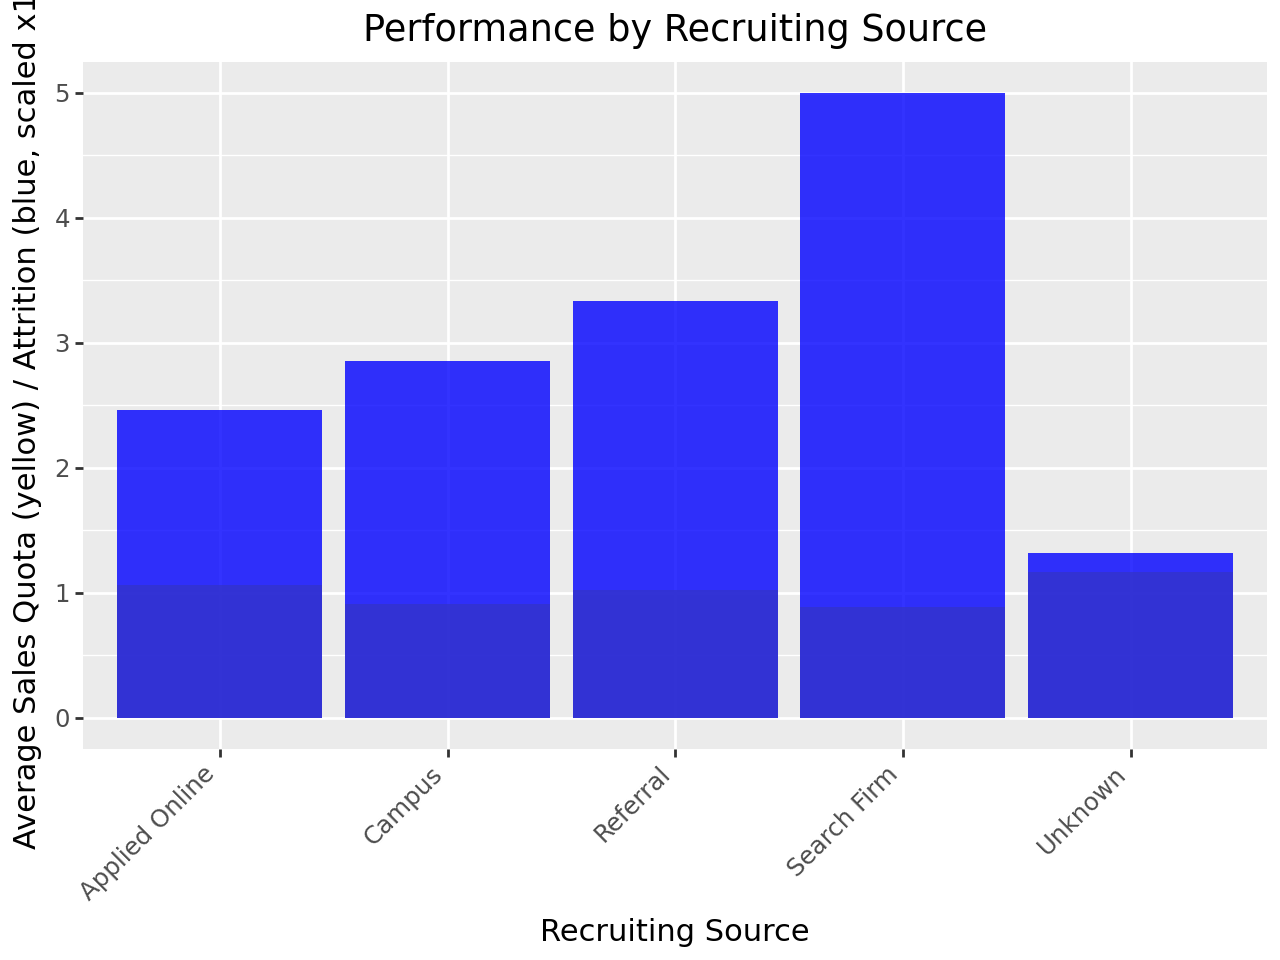

In [86]:
# Plotting the data using plotnine
plot = (
    ggplot(performance_data, aes(x='recruiting_source')) +
    geom_bar(aes(y='average_sales_quota'), stat='identity', fill='#FFFF00', alpha=0.8) +  # Yellow color
    geom_bar(aes(y='average_attrition * 10'), stat='identity', fill='#0000FF', alpha=0.8) +  # Blue color
    labs(title='Performance by Recruiting Source',
         x='Recruiting Source',
         y='Average Sales Quota (yellow) / Attrition (blue, scaled x10)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for better readability
)

# Display the plot
plot.show()



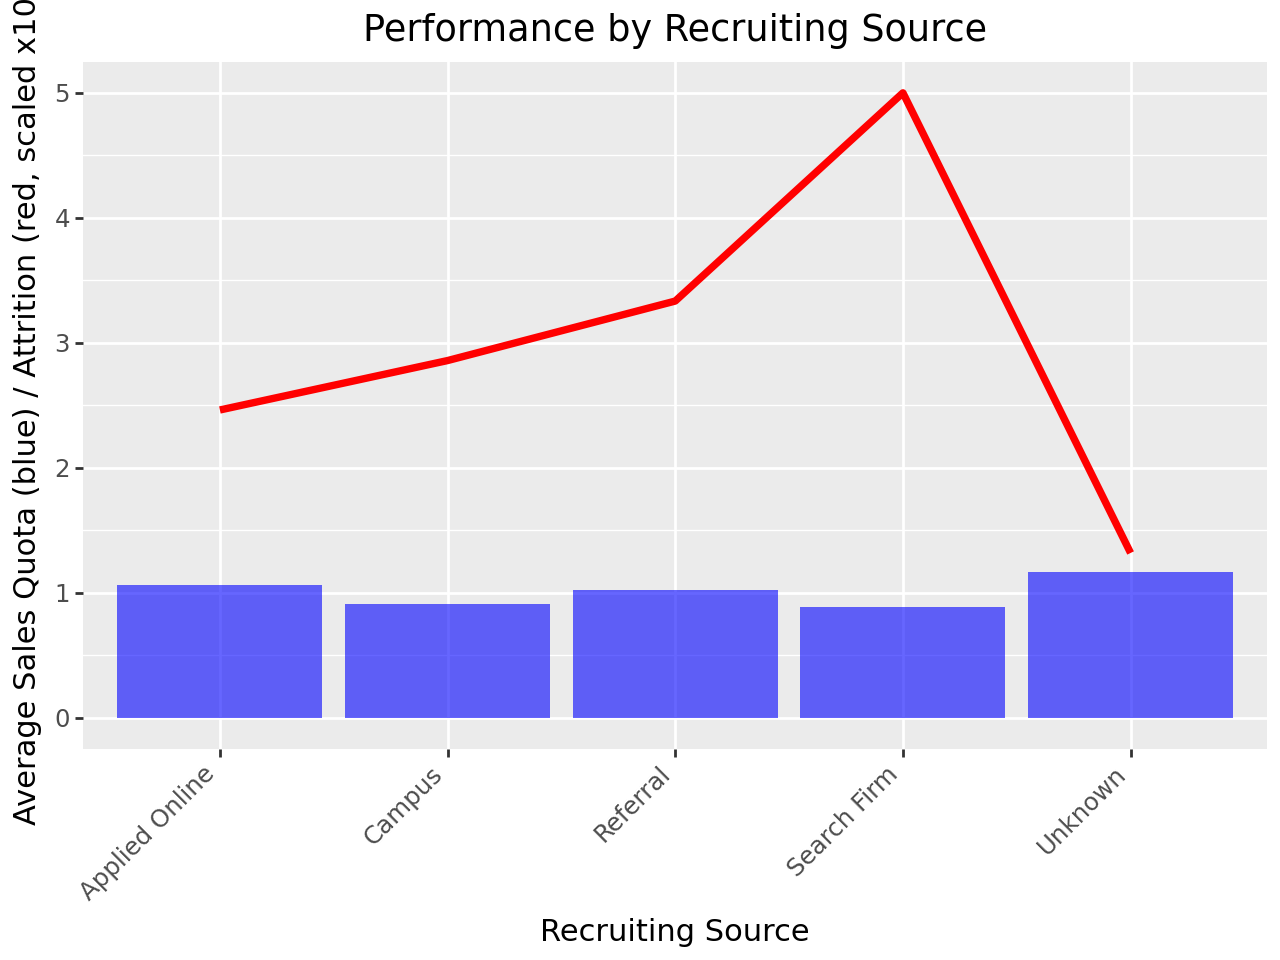

In [83]:
# Plotting the data using plotnine
plot = (
    ggplot(performance_data, aes(x='recruiting_source')) +
    geom_bar(aes(y='average_sales_quota'), stat='identity', fill='blue', alpha=0.6) +
    geom_line(aes(y='average_attrition * 10'), color='red', size=1.5, group=1) +
    labs(title='Performance by Recruiting Source',
         x='Recruiting Source',
         y='Average Sales Quota (blue) / Attrition (red, scaled x10)') +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +  # Rotate x-axis labels for better readability
    theme(legend_position='top')  # Adjust legend position
)
plot.show()